In [137]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
df_train = pd.read_csv("titanic/train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# Descrição das variáveis
Age: Contínua -> idade dos passageiros.

Fare: Contínua -> tarifa paga pelo passageiro.

SibSp: Discreta -> número de irmãos ou cônjuges viajando com o passageiro.

Parch: Discreta -> número de pais ou filhos viajando com o passageiro.

PassengerId: Discreta -> identificador de cada passageiro

Survived: Discreta -> passageiro sobreviveu (1) ou não (0) (TARGET).

Sex: Categórica -> gênero do passageiro (masculino ou feminino).

Pclass: Categórica -> classe de viagem do passageiro (1ª, 2ª ou 3ª classe).

Embarked: Categórica -> porto onde o passageiro embarcou (C = Cherbourg, Q = Queenstown, S = 
Southampton).

Cabin: Categórica -> número da cabine.

Ticket: Categórica -> número do bilhete.

Name: Categórica -> nome do passageiro;


In [139]:
df_train = df_train.drop(columns=["PassengerId", "Name", "Ticket"])
df_train.describe(include="all")

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


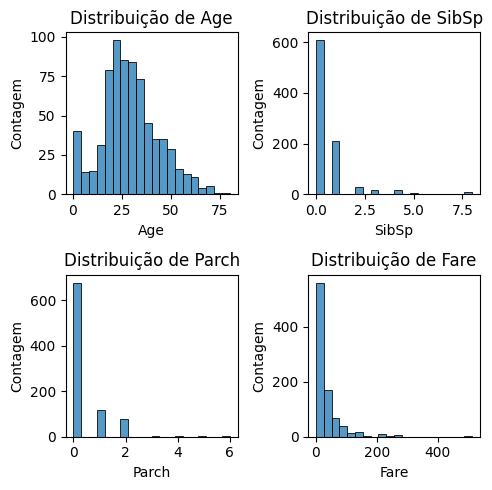

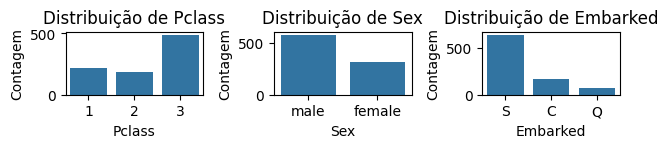

In [140]:
numeric_vars = ['Age', 'SibSp', 'Parch', 'Fare']
categorical_vars = ['Pclass', 'Sex', 'Embarked']

plt.figure(figsize=(5, 5))


for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[var], bins=20, kde=False)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(4, 3, i)
    sns.countplot(x=var, data=df_train)
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

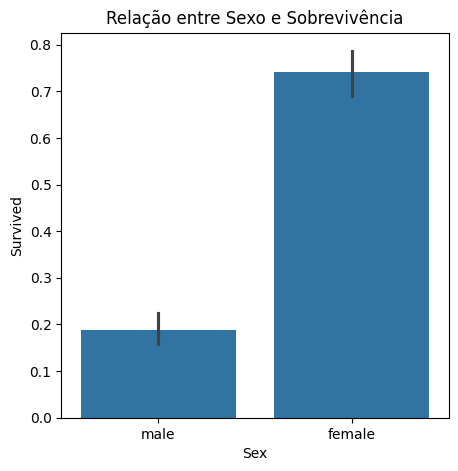

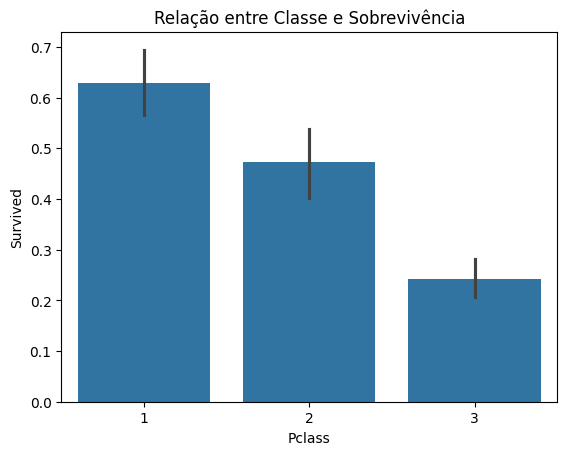

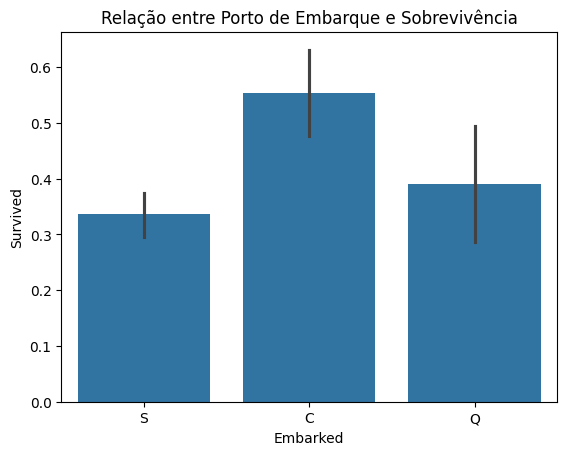

In [141]:
plt.figure(figsize=(5, 5))

sns.barplot(x='Sex', y='Survived', data=df_train)
plt.title('Relação entre Sexo e Sobrevivência')
plt.show()

sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('Relação entre Classe e Sobrevivência')
plt.show()

sns.barplot(x='Embarked', y='Survived', data=df_train)
plt.title('Relação entre Porto de Embarque e Sobrevivência')
plt.show()


In [142]:
#Verificando valores ausentes
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [143]:

# Preencher valores ausentes em 'Age' com a mediana
imputer_median = SimpleImputer(strategy='median')
df_train['Age'] = imputer_median.fit_transform(df_train[['Age']])


# Preencher valores ausentes em 'Embarked' com o valor mais frequente
imputer_most_frequent = SimpleImputer(strategy='most_frequent')
df_train['Embarked'] = imputer_most_frequent.fit_transform(df_train[['Embarked']])


# Remover a coluna 'Cabin' devido a muitos valores ausentes
df_train = df_train.drop(columns=['Cabin'])

# Verificar novamente os valores ausentes após o tratamento
print(df_train.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [144]:
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

In [145]:
#Checar Outliers

Q1 = df_train['Fare'].quantile(0.25)
Q3 = df_train['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrando valores fora dos limites
outliers_fare = df_train[(df_train['Fare'] < lower_bound) | (df_train['Fare'] > upper_bound)]
print(f"Outliers em 'Fare': {len(outliers_fare)} encontrados")
df_train = df_train[(df_train['Fare'] >= lower_bound) & (df_train['Fare'] <= upper_bound)]



Outliers em 'Fare': 116 encontrados


In [146]:
#Criando variáveis a partir de informações pré-existentes
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1  # +1 inclui o próprio passageiro

df_train['IsAlone'] = 0
df_train.loc[df_train['FamilySize'] == 1, 'IsAlone'] = 1


In [147]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'Fare', 'SibSp', 'Parch']

scaler = StandardScaler()
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])

df_train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,FamilySize,IsAlone
0,0,-0.528321,0.625606,-0.433718,-0.779117,1,0,1,0,1,2,0
2,1,-0.215182,-0.486423,-0.433718,-0.729373,0,0,1,0,1,1,1
3,1,0.489381,0.625606,-0.433718,2.599828,0,0,1,0,0,2,0
4,0,0.489381,-0.486423,-0.433718,-0.720161,1,0,1,0,1,1,1
5,0,-0.058613,-0.486423,-0.433718,-0.690071,1,1,0,0,1,1,1


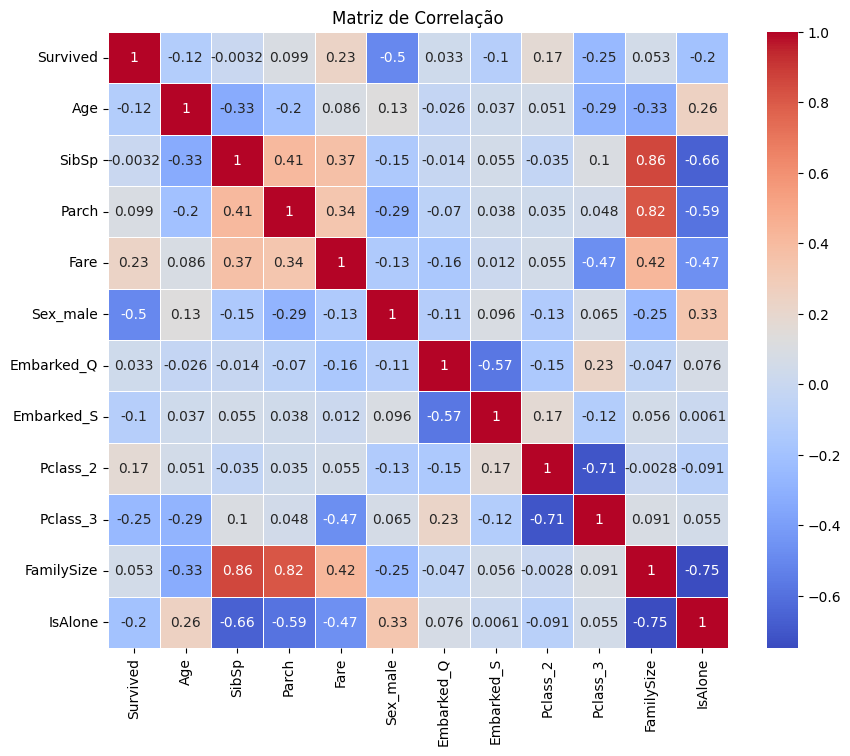

In [148]:
#Checando correlação 
correlation = df_train.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

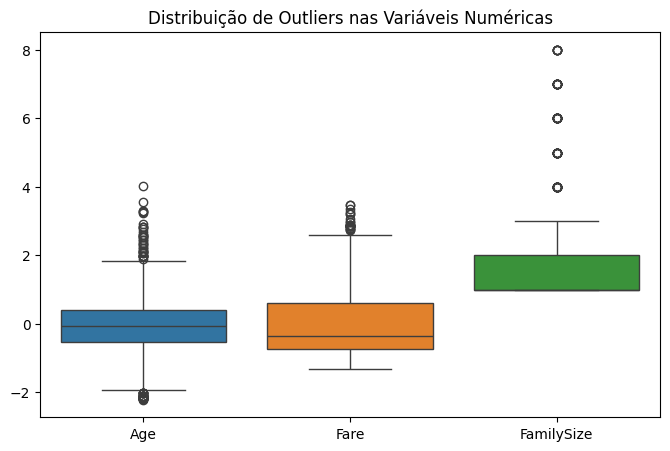

In [149]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train[['Age', 'Fare', 'FamilySize']])
plt.title('Distribuição de Outliers nas Variáveis Numéricas')
plt.show()

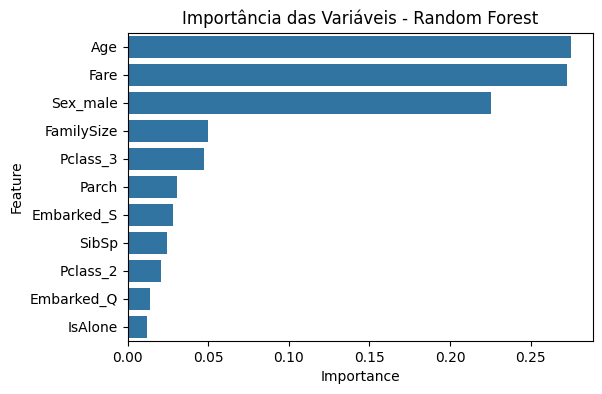

In [150]:
#Análise de Importância das Variáveis com Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = df_train.drop(columns='Survived')
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Variáveis - Random Forest')
plt.show()


In [151]:
X_train_selected = X_train[feature_importance_df].dropna()
X_test_selected = X_test[feature_importance_df].dropna()

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Instanciar e treinar o modelo
log_reg = LogisticRegression(max_iter=200, random_state=42)
log_reg.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_log_reg = log_reg.predict(X_test)

# Avaliar o desempenho
print("Regressão Logística - Acurácia:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Regressão Logística - Acurácia: 0.7741935483870968
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        95
           1       0.75      0.63      0.68        60

    accuracy                           0.77       155
   macro avg       0.77      0.75      0.75       155
weighted avg       0.77      0.77      0.77       155



In [152]:
from sklearn.ensemble import RandomForestClassifier

# Instanciar e treinar o modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliar o desempenho
print("Random Forest - Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest - Acurácia: 0.7612903225806451
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        95
           1       0.71      0.65      0.68        60

    accuracy                           0.76       155
   macro avg       0.75      0.74      0.74       155
weighted avg       0.76      0.76      0.76       155



In [153]:
from sklearn.tree import DecisionTreeClassifier

# Instanciar e treinar o modelo
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_dt = dt_model.predict(X_test)

# Avaliar o desempenho
print("Árvore de Decisão - Acurácia:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Árvore de Decisão - Acurácia: 0.7483870967741936
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        95
           1       0.68      0.67      0.67        60

    accuracy                           0.75       155
   macro avg       0.73      0.73      0.73       155
weighted avg       0.75      0.75      0.75       155



In [154]:
from sklearn.ensemble import GradientBoostingClassifier

# Instanciar e treinar o modelo
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_gb = gb_model.predict(X_test)

# Avaliar o desempenho
print("Gradient Boosting - Acurácia:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))


Gradient Boosting - Acurácia: 0.8
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        95
           1       0.81      0.63      0.71        60

    accuracy                           0.80       155
   macro avg       0.80      0.77      0.78       155
weighted avg       0.80      0.80      0.79       155



In [155]:
from sklearn.svm import SVC

# Instanciar e treinar o modelo
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred_svm = svm_model.predict(X_test)

# Avaliar o desempenho
print("SVM - Acurácia:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM - Acurácia: 0.7806451612903226
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        95
           1       0.76      0.63      0.69        60

    accuracy                           0.78       155
   macro avg       0.78      0.75      0.76       155
weighted avg       0.78      0.78      0.78       155



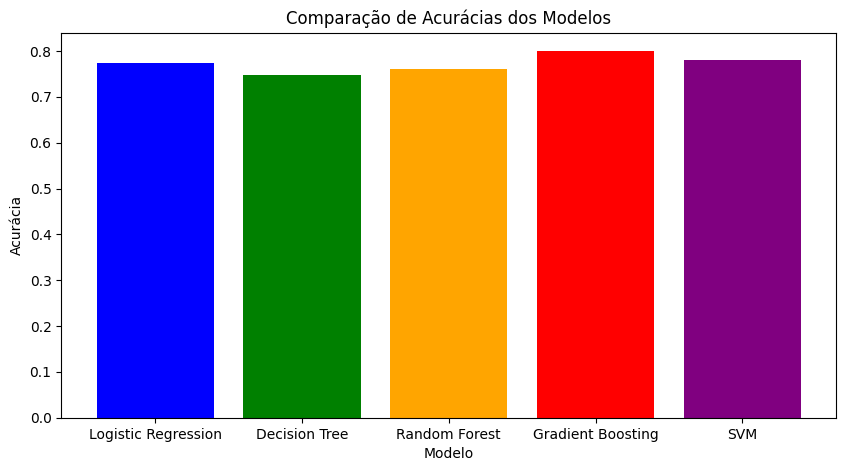

In [156]:
import matplotlib.pyplot as plt

# Dicionário com os nomes dos modelos e suas acurácias
model_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_log_reg),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb),
    'SVM': accuracy_score(y_test, y_pred_svm)
}

# Gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(model_scores.keys(), model_scores.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Comparação de Acurácias dos Modelos')
plt.ylabel('Acurácia')
plt.xlabel('Modelo')
plt.show()


In [157]:
from sklearn.model_selection import GridSearchCV

# Definir os parâmetros que deseja testar
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.05],
    'max_depth': [3, 4, 5]
}

# Instanciar o Gradient Boosting com GridSearch
gb_model = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Ajustar o GridSearch com os dados de treino
grid_search.fit(X_train, y_train)

# Exibir os melhores parâmetros e o melhor score
print(f"Melhores parâmetros: {grid_search.best_params_}")
print(f"Melhor acurácia: {grid_search.best_score_}")


Melhores parâmetros: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 200}
Melhor acurácia: 0.8435483870967742


In [111]:
# Prever no conjunto de teste com o modelo otimizado
best_model = grid_search.best_estimator_
y_pred_gb_tuned = best_model.predict(X_test)

# Avaliar o desempenho
from sklearn.metrics import accuracy_score, classification_report

print("Acurácia no conjunto de teste:", accuracy_score(y_test, y_pred_gb_tuned))
print(classification_report(y_test, y_pred_gb_tuned))


Acurácia no conjunto de teste: 0.8129032258064516
              precision    recall  f1-score   support

           0       0.82      0.89      0.85        95
           1       0.80      0.68      0.74        60

    accuracy                           0.81       155
   macro avg       0.81      0.79      0.80       155
weighted avg       0.81      0.81      0.81       155



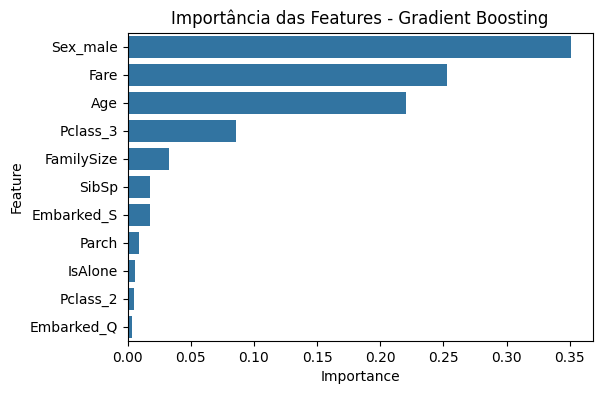

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obter a importância das features do modelo otimizado
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': best_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Gráfico de importâncias das features
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importância das Features - Gradient Boosting')
plt.show()


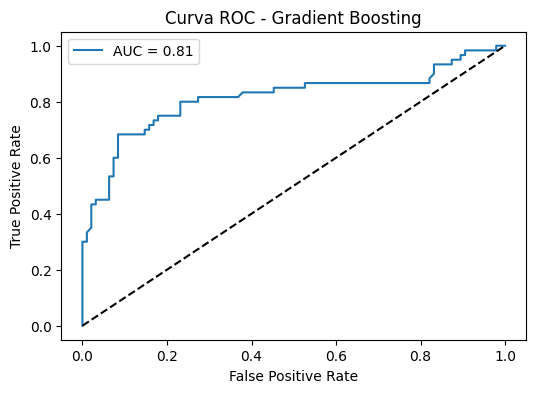

In [115]:
from sklearn.metrics import roc_curve, roc_auc_score

# Prever as probabilidades para a classe positiva
y_prob_gb = best_model.predict_proba(X_test)[:, 1]

# Gerar a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob_gb)
auc_score = roc_auc_score(y_test, y_prob_gb)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Gradient Boosting')
plt.legend()
plt.show()


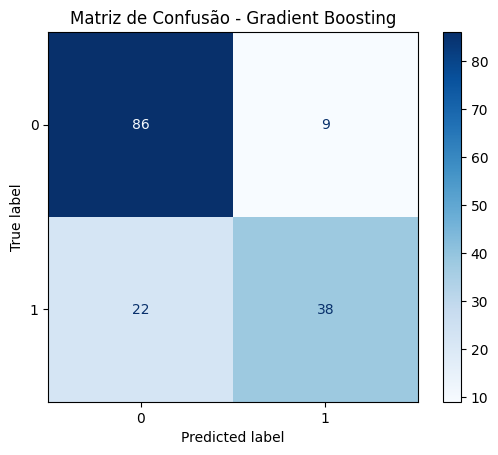

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prever no conjunto de teste
y_pred = gb_model.predict(X_test)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Visualizar a matriz de confusão
disp.plot(cmap='Blues')
plt.title('Matriz de Confusão - Gradient Boosting')
plt.show()


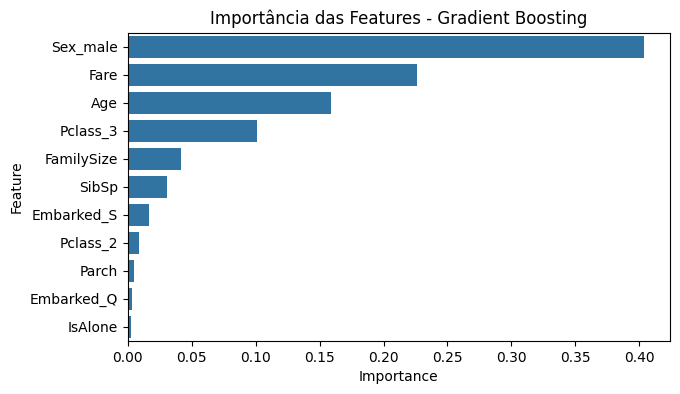

In [108]:
import pandas as pd
import seaborn as sns

# Obter a importância das features do modelo
feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': gb_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Gráfico de importâncias das features
plt.figure(figsize=(7, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importância das Features - Gradient Boosting')
plt.show()


In [109]:
from sklearn.metrics import classification_report

# Relatório de classificação
print("Relatório de Classificação - Gradient Boosting")
print(classification_report(y_test, y_pred))

Relatório de Classificação - Gradient Boosting
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        95
           1       0.81      0.63      0.71        60

    accuracy                           0.80       155
   macro avg       0.80      0.77      0.78       155
weighted avg       0.80      0.80      0.79       155



In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

gradient_boosting_model = GradientBoostingClassifier()
cv_scores = cross_val_score(gradient_boosting_model, X_train, y_train, cv=10, scoring='accuracy')

print(f"Acurácias obtidas em cada divisão: {cv_scores}")
print(f"Média da acurácia: {cv_scores.mean()}")
print(f"Desvio padrão das acurácias: {cv_scores.std()}")


Acurácias obtidas em cada divisão: [0.83870968 0.79032258 0.83870968 0.88709677 0.79032258 0.82258065
 0.9516129  0.83870968 0.79032258 0.75806452]
Média da acurácia: 0.8306451612903226
Desvio padrão das acurácias: 0.05312796481290519


In [158]:
import joblib

# Supondo que 'modelo' seja o seu modelo treinado
joblib.dump(gb_model, 'gradient_boosting_model.pkl')

['gradient_boosting_model.pkl']